In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

property = 'Temp_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -18.078; max value: 36.06785714


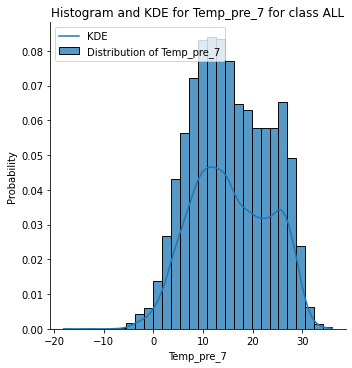

In [2]:
x = np.linspace(min_amount, max_amount, num=100)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 30)

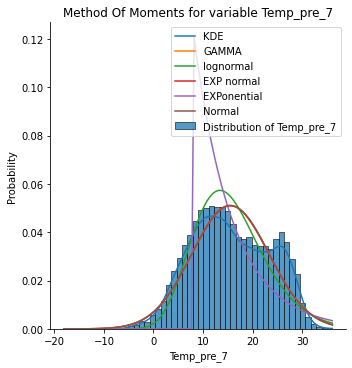

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.469506448503778), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1956999999999951, pvalue=0.27749429769042333)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.23, pvalue=0.009878183186176536), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.42959999999999354, pvalue=0.06048196983166687)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.469506448503778), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.19999999999999574, pvalue=0.2689298575502499)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.48, pvalue=8.448372017533173e-11), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.7958, pvalue=2.08176859972653e-07)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.4

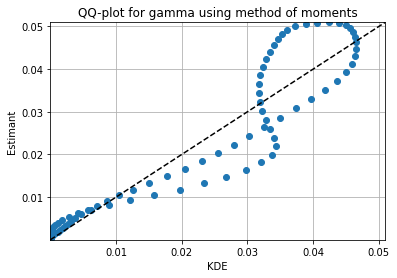

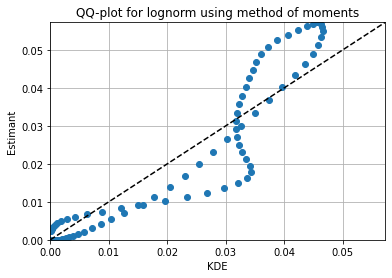

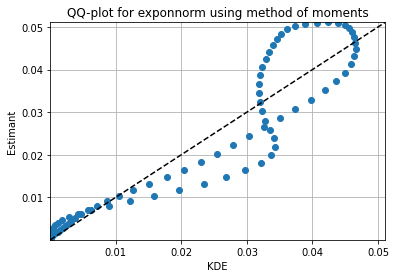

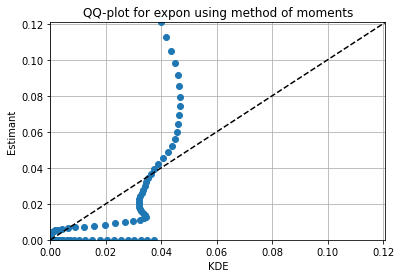

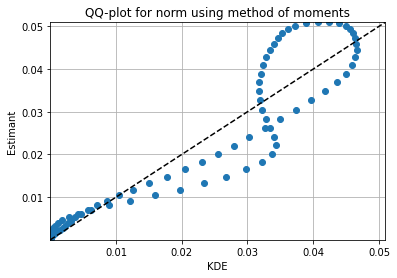

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

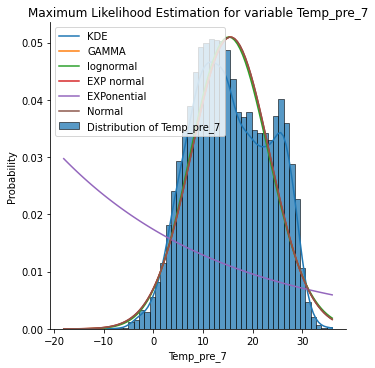

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.469506448503778), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.19589999999999463, pvalue=0.2770887835182927)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.469506448503778), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1862999999999957, pvalue=0.297381944024553)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, pvalue=0.469506448503778), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.21640000000000015, pvalue=0.23902942010749217)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.43, pvalue=1.1151678185620634e-08), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.904299999999999, pvalue=1.1949203970740285e-07)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.12, p

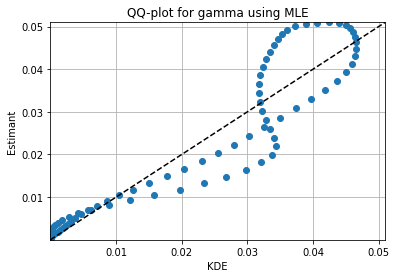

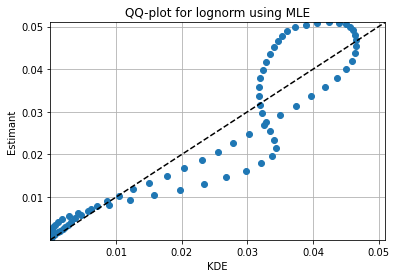

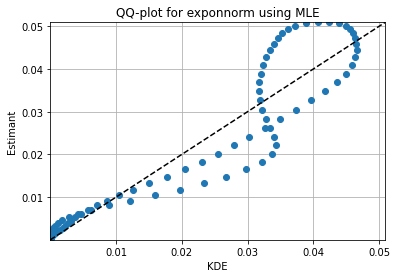

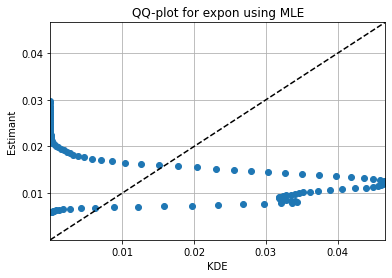

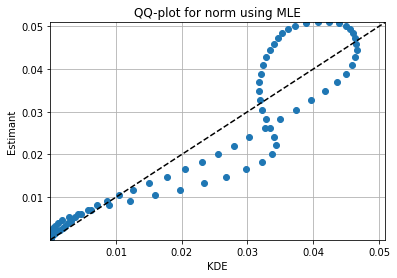

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

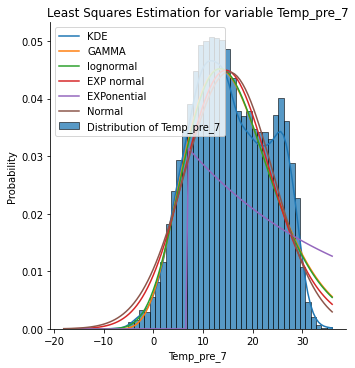

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.2, pvalue=0.03638428787491733), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.28429999999999467, pvalue=0.1502961971174701)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.15, pvalue=0.21117008625127576), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1903999999999968, pvalue=0.28850410012600614)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.2819416298082479), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.3188999999999993, pvalue=0.12002998141084942)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.46, pvalue=6.422179651064002e-10), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3373749999999944, pvalue=1.3116873032181786e-08)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.

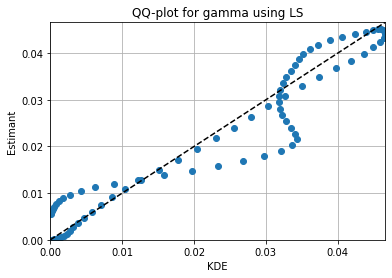

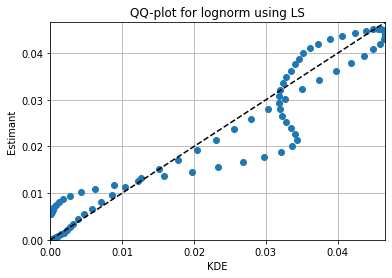

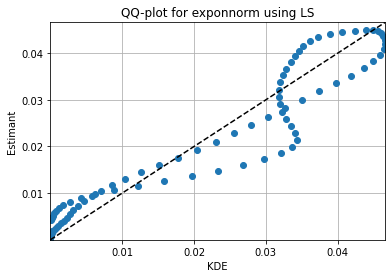

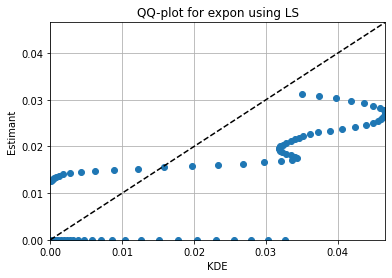

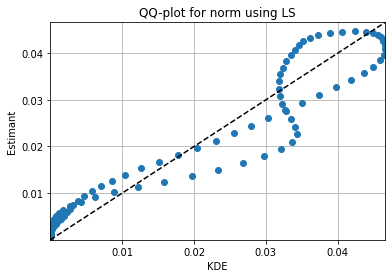

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

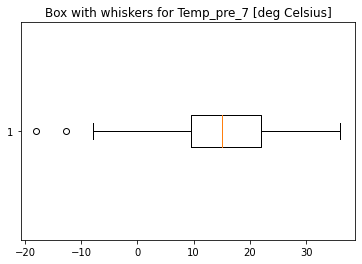

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} [deg Celsius]')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()